<a href="https://colab.research.google.com/github/MAYFIFTH99/MidExamProject/blob/main/SW%EC%98%A4%ED%94%88%EC%86%8C%EC%8A%A4_%ED%99%9C%EC%9A%A9%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd

In [90]:
raw_hawaii_df = pd.read_csv("/content/sample_data/Hawaii_COVID-19_Cases.csv")

In [91]:
df = pd.read_csv("/content/sample_data/owid-covid-data.csv")
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
392463      ZWE    Africa     Zimbabwe  2024-04-03     266359.0        0.0   
392464      ZWE    Africa     Zimbabwe  2024-04-04     266359.0        0.0   
392465      ZWE    Africa     Zimbabwe  2024-04-05     266359.0        0.0   
392466      ZWE    Africa     Zimbabwe  2024-04-06     266359.0        0.0   
392467      ZWE    Africa     Zimbabwe  2024-04-07     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [92]:
selected_columns = ['iso_code','location','date','total_cases','population']

In [93]:
revised_df = df[selected_columns]

In [94]:
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-05,NaN,41128772.0
1,AFG,Afghanistan,2020-01-06,NaN,41128772.0
2,AFG,Afghanistan,2020-01-07,NaN,41128772.0
3,AFG,Afghanistan,2020-01-08,NaN,41128772.0
4,AFG,Afghanistan,2020-01-09,NaN,41128772.0


In [95]:
location = df['location'].unique()

In [96]:
kor_df = revised_df[revised_df.location=='South Korea']

In [97]:
kor_date_index_df = kor_df.set_index('date')

In [98]:
usa_df = revised_df[revised_df.location=='United States']

In [99]:
usa_date_index_df = usa_df.set_index('date')

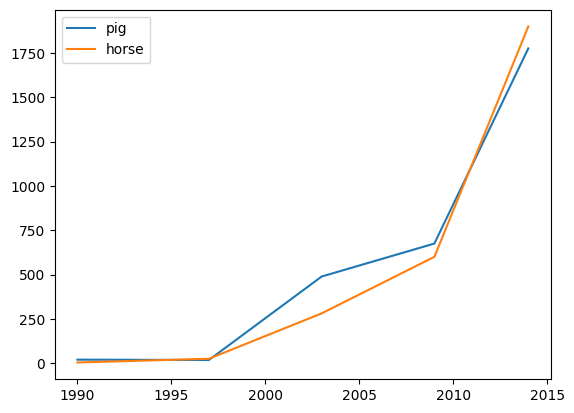

In [100]:
df1 = pd.DataFrame({
    'pig':[20,18,489,675,1776],
    'horse':[4,25,281,600,1900]
}, index = [1990, 1997, 2003, 2009, 2014])
lines = df1.plot.line()

In [101]:
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-05           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
                 ...    
2024-04-03    34571873.0
2024-04-04    34571873.0
2024-04-05    34571873.0
2024-04-06    34571873.0
2024-04-07    34571873.0
Name: total_cases, Length: 1555, dtype: float64

In [102]:
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-05   NaN
2020-01-06   NaN
2020-01-07   NaN
2020-01-08   NaN
2020-01-09   NaN
              ..
2024-04-14   NaN
2024-04-15   NaN
2024-04-16   NaN
2024-04-17   NaN
2024-04-18   NaN
Name: total_cases, Length: 1566, dtype: float64

In [103]:
kor_date_index_df.index

Index(['2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
       '2020-01-10', '2020-01-11', '2020-01-12', '2020-01-13', '2020-01-14',
       ...
       '2024-03-29', '2024-03-30', '2024-03-31', '2024-04-01', '2024-04-02',
       '2024-04-03', '2024-04-04', '2024-04-05', '2024-04-06', '2024-04-07'],
      dtype='object', name='date', length=1555)

In [104]:
#시각화용 데이터프레임 생성
final_df = pd.DataFrame({
    'KOR': kor_total_cases,
    'USA': usa_total_cases
}, index=kor_date_index_df.index
)

# 일부 데이터 확인
final_df.head(100)

,KOR,USA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2020-04-09,10237.0,302460.0
2020-04-10,10237.0,302460.0
2020-04-11,10237.0,302460.0


<Axes: xlabel='date'>

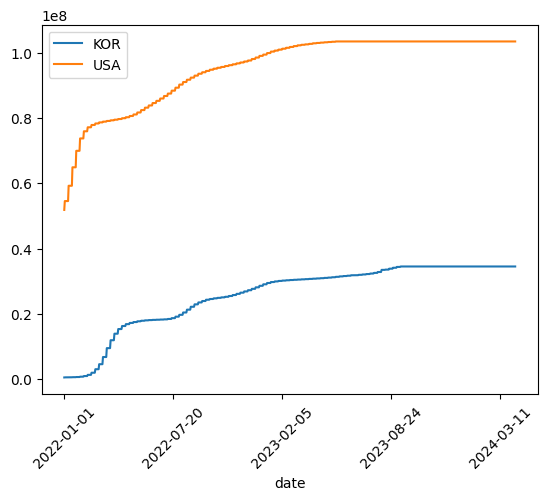

In [105]:
final_df['2022-01-01':].plot.line(rot=45)

In [106]:
kor_population = kor_date_index_df['population']['2020-01-22']

usa_population = usa_date_index_df['population']['2020-01-22']

print('미국 인구(', usa_population,')/ 대한민국 인구(',
      kor_population,')')

미국 인구( 338289856.0 )/ 대한민국 인구( 51815808.0 )


In [107]:
rate = round((usa_population / kor_population),2)
rate
final_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * rate,
    'USA': usa_total_cases
    }, index = kor_date_index_df.index
)

final_revised_df.head()


,KOR,USA
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN


In [108]:
filtered_hawaii_df = raw_hawaii_df[['submission_date','tot_cases']]

filtered_hawaii_df.head()

,submission_date,tot_cases
0,06/17/2021,35862
1,12/30/2021,106350
2,11/12/2020,16171
3,11/10/2020,15961
4,07/23/2021,38499


In [109]:
sorted_hawaii_df = filtered_hawaii_df.sort_values(by='submission_date')

sorted_hawaii_df

,submission_date,tot_cases
14,01/01/2021,21258
793,01/01/2022,112283
420,01/02/2021,21417
818,01/02/2022,115400
551,01/03/2021,21539
...,...,...
544,12/29/2021,102925
913,12/30/2020,20851
1,12/30/2021,106350
895,12/31/2020,21026


In [110]:
sorted_hawaii_df['date'] = pd.to_datetime(filtered_hawaii_df['submission_date'])

sorted_hawaii_df.head()

,submission_date,tot_cases,date
14,01/01/2021,21258,2021-01-01
793,01/01/2022,112283,2022-01-01
420,01/02/2021,21417,2021-01-02
818,01/02/2022,115400,2022-01-02
551,01/03/2021,21539,2021-01-03


In [111]:
sorted_hawaii_df.sort_values(by = 'date', inplace = True)

sorted_hawaii_df

,submission_date,tot_cases,date
172,01/22/2020,0,2020-01-22
105,01/23/2020,0,2020-01-23
856,01/24/2020,0,2020-01-24
1000,01/25/2020,0,2020-01-25
933,01/26/2020,0,2020-01-26
...,...,...,...
860,10/14/2022,349598,2022-10-14
569,10/15/2022,349598,2022-10-15
978,10/16/2022,349598,2022-10-16
651,10/17/2022,349598,2022-10-17


In [112]:
sorted_hawaii_df.set_index('date', inplace=True)

In [113]:
hawaii_total_cases = sorted_hawaii_df['tot_cases']

hawaii_total_cases

date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2022-10-14    349598
2022-10-15    349598
2022-10-16    349598
2022-10-17    349598
2022-10-18    349598
Name: tot_cases, Length: 1001, dtype: int64

In [115]:
hawaii_population = 1_443_336

hawaii_rate = round((hawaii_population / kor_population),2)
hawaii_rate

0.03

In [116]:
final_hawaii_revised_df = pd.DataFrame({
    'KOR':kor_total_cases * hawaii_rate,
    'HAWAII' : hawaii_total_cases}, index = kor_date_index_df.index)

final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-05,NaN,NaN
2020-01-06,NaN,NaN
2020-01-07,NaN,NaN
2020-01-08,NaN,NaN
2020-01-09,NaN,NaN
...,...,...
2024-04-03,1037156.19,NaN
2024-04-04,1037156.19,NaN
2024-04-05,1037156.19,NaN


In [117]:
kor_total_cases

date
2020-01-05           NaN
2020-01-06           NaN
2020-01-07           NaN
2020-01-08           NaN
2020-01-09           NaN
                 ...    
2024-04-03    34571873.0
2024-04-04    34571873.0
2024-04-05    34571873.0
2024-04-06    34571873.0
2024-04-07    34571873.0
Name: total_cases, Length: 1555, dtype: float64

In [118]:
hawaii_total_cases

date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2022-10-14    349598
2022-10-15    349598
2022-10-16    349598
2022-10-17    349598
2022-10-18    349598
Name: tot_cases, Length: 1001, dtype: int64

In [121]:
str(kor_total_cases.index.dtype)

'object'

In [120]:
str(hawaii_total_cases.index.dtype)

'datetime64[ns]'

In [122]:
hawaii_total_cases.index = hawaii_total_cases.index.astype('string')

str(hawaii_total_cases.index.dtype)


'string'